In [2]:
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as mplcm
import matplotlib.colors as colors

In [ ]:
first_sub = ['Tigger1', 'L1MEf', 'L1MA9', 'L1MA9', \
             'L1MA9', 'L1MB8', 'MER5A', 'L1MA9', \
             'L1ME3C', 'L1MA9', 'L1M5', 'L1M5', \
             'L1MB1']
second_sub = ['MER113', 'L1ME3D', 'L1MCa', 'L1MB7', 'L2a', 'L1MA6', 'L1MC1', 'L1ME2z', 'MLT2D', 'L1MA7', 'Charlie1']

In [ ]:
list(set(first_sub) & set(second_sub))

In [ ]:
v = venn2([set(first_sub), set(second_sub)], set_labels = ('Cluster A', 'Cluster B'), set_colors=('blue', 'orange'), alpha = 0.5);
v.get_label_by_id('10').set_text('\n'.join(set(first_sub)))
v.get_label_by_id('01').set_text('\n'.join(set(second_sub)))

In [ ]:
labels = first_sub + second_sub
labels = set(labels)
first_counts = dict(zip(labels, np.zeros(len(labels))))

for f in first_sub:
    if f not in first_counts.keys():
        first_counts[f] = 1
    else:
        first_counts[f] += 1
second_counts = dict(zip(labels, np.zeros(len(labels))))
for s in second_sub:
    if s not in second_counts.keys():
        second_counts[s] = 1
    else:
        second_counts[s] += 1


In [ ]:
print(first_counts)
print(second_counts)

In [ ]:

from matplotlib.pyplot import figure

figure(figsize=(12,10), dpi=80)

f_names = list(first_counts.keys())
f_values = list(first_counts.values())
s_names = list(second_counts.keys())
s_values = list(second_counts.values())


def subcategorybar(X, vals, width=0.7):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label = 'Cluster B')   
    plt.xticks(_X, X)
    plt.xticks(rotation = 45)

subcategorybar(f_names, [f_values,s_values])
plt.ylabel('Frequency')
plt.xlabel('TE SubFamily')
plt.legend()
plt.show()


# 

{'MLT1H', 'MLT1D', 'MLT1I', 'MIR1_Amn', 'MIR', 'Charlie2b', 'X7B_LINE', 'MLT1B', 'MER34-int', 'L2a', 'L4_A_Mam', 'MER20B', 'MER105', 'MER58A', 'Charlie1b', 'MER5B', 'Tigger3', 'MER2', 'MER5A', 'MER34B-int', 'Charlie1a', 'LTR16C', 'MER112', 'ERVL-E-int', 'Tigger6a', 'MLT1G3', 'L2d2', 'MLT1G1', 'ERV3-16A3_I', 'L3', 'MIRb', 'L2', 'DNA-2-24B_DR', 'MER20', 'Tigger13a', 'MLT1J', 'MER34C_v', 'LTR50', 'LTR79', 'MLT1K', 'L2c', 'Arthur2', 'Charlie5', 'MLT1C2', 'L2b', 'MER31-int', 'Charlie8'}
20


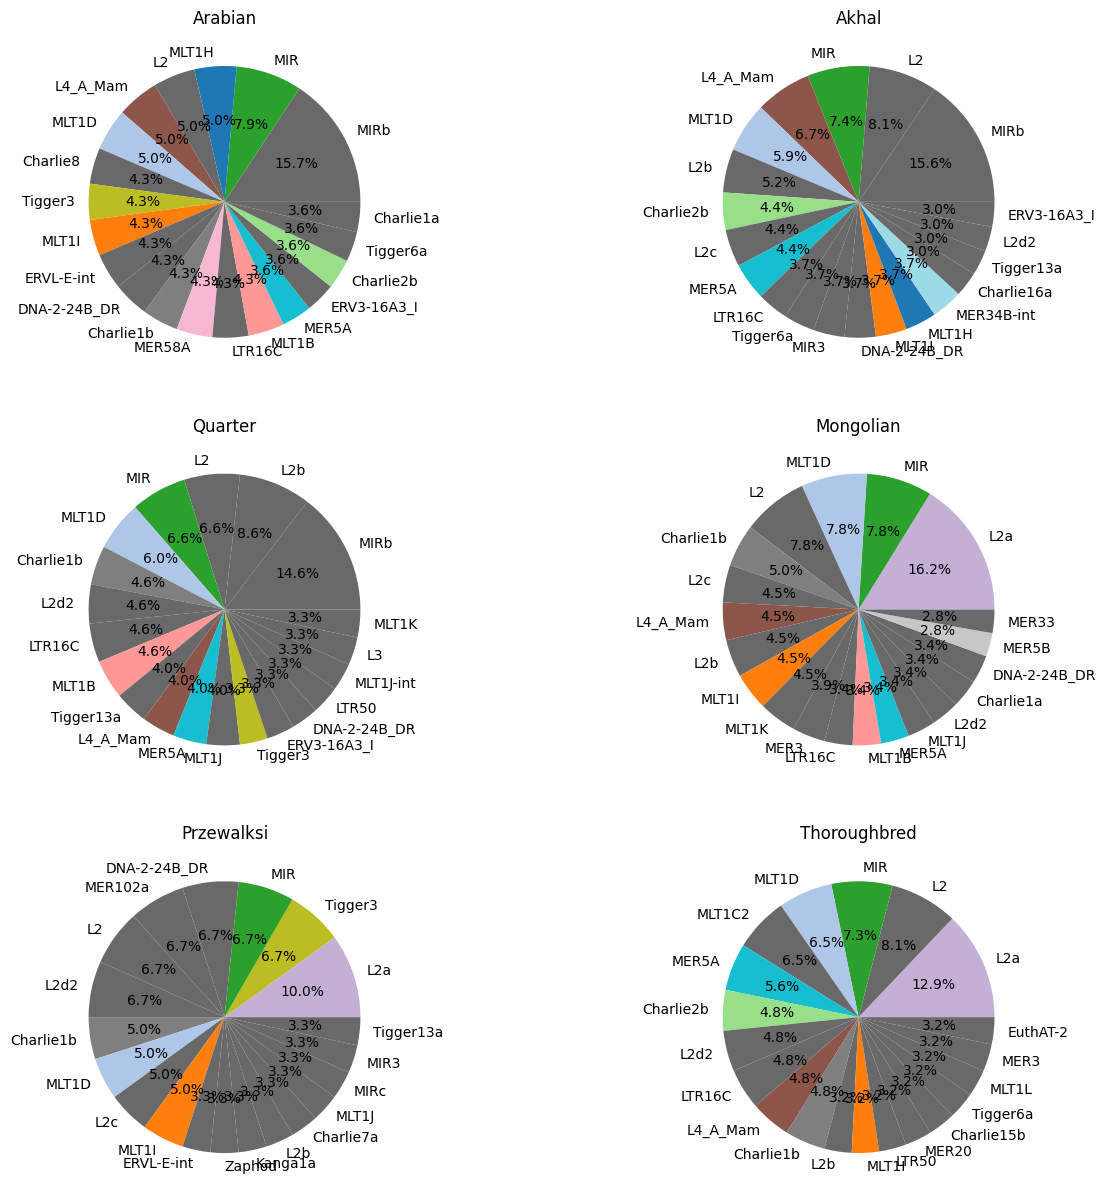

In [53]:
df = pd.read_csv('horse/annotated_tes/arabian_te.txt', sep='\t', lineterminator='\n')
df.columns = ['chrom','start','end','subfam','fam']
df = df[df["subfam"].str.contains("L1") == False]
x = df['subfam'].value_counts()
y = df['fam'].value_counts()
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 15))

df1 = pd.read_csv('horse/annotated_tes/akhal_te.txt', sep='\t', lineterminator='\n')
df1.columns = ['chrom','start','end','subfam','fam']
df1 = df1[df1["subfam"].str.contains("L1") == False]
x1 = df1['subfam'].value_counts()
y1 = df1['fam'].value_counts()

df2 = pd.read_csv('horse/annotated_tes/quarter_te.txt', sep='\t', lineterminator='\n')
df2.columns = ['chrom','start','end','subfam','fam']
df2 = df2[df2["subfam"].str.contains("L1") == False]
x2 = df2['subfam'].value_counts()
y2 = df2['fam'].value_counts()

df3 = pd.read_csv('horse/annotated_tes/mongolian_te.txt', sep='\t', lineterminator='\n')
df3.columns = ['chrom','start','end','subfam','fam']
df3 = df3[df3["subfam"].str.contains("L1") == False]
x3 = df3['subfam'].value_counts()
y3 = df3['fam'].value_counts()

df4 = pd.read_csv('horse/annotated_tes/thorough_te.txt', sep='\t', lineterminator='\n')
df4.columns = ['chrom','start','end','subfam','fam']
df4 = df4[df4["subfam"].str.contains("L1") == False]
x4 = df4['subfam'].value_counts()
y4 = df4['fam'].value_counts()

df5 = pd.read_csv('horse/annotated_tes/przewalksi_te.txt', sep='\t', lineterminator='\n')
df5.columns = ['chrom','start','end','subfam','fam']
df5 = df5[df5["subfam"].str.contains("L1") == False]
x5 = df5['subfam'].value_counts()
y5 = df5['fam'].value_counts()


s = 1
e = 21

t = x
t1 = x1

t2 = x2
t3 = x3
t4 = x4
t5 = x5

#labels = set(list(t1.keys()) + list(t.keys()))
#print(len(labels))
#print(labels)
#shared_labels = set(t.keys()).intersection(set(t1.keys()))
shared_labels = set.intersection(set(t.keys()), set(t1.keys()), set(t2.keys()), set(t3.keys()))
#shared_labels = set(t.keys()).intersection(set(t1.keys()))
print(shared_labels)
colours = dict(zip(shared_labels, plt.cm.tab20.colors[:len(shared_labels)]))
print(len(colours))

plot = t[s:e].plot.pie(title="Arabian", legend=False, ylabel='', \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0,ax=axes[0,0],
                   colors=[colours[v] if v in colours else 'dimgray' for v in t[s:e].keys()])

plot = t1[s:e].plot.pie(title="Akhal", legend=False, ylabel='', \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0,ax=axes[0,1], 
                   colors=[colours[v] if v in colours else 'dimgray' for v in t1[s:e].keys()])

plot = t2[s:e].plot.pie(title="Quarter", legend=False, ylabel='', \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0,ax=axes[1,0], 
                   colors=[colours[v] if v in colours else 'dimgray' for v in t2[s:e].keys()])

plot = t3[s:e].plot.pie(title="Mongolian", legend=False, ylabel='', \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0,ax=axes[1,1], 
                   colors=[colours[v] if v in colours else 'dimgray' for v in t3[s:e].keys()])

plot = t4[s:e].plot.pie(title="Thoroughbred", legend=False, ylabel='', \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0,ax=axes[2,1], 
                   colors=[colours[v] if v in colours else 'dimgray' for v in t4[s:e].keys()])

plot = t5[s:e].plot.pie(title="Przewalksi", legend=False, ylabel='', \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0,ax=axes[2,0], 
                   colors=[colours[v] if v in colours else 'dimgray' for v in t5[s:e].keys()])

#x[0:30].plot(kind='bar',xlabel='TE Subfamily', ylabel='Frequency')

### 

{'DNA/hAT-Charlie': 'aquamarine', 'LINE/L2': 'blue', 'LTR/ERVL-MaLR': 'chocolate', 'SINE/MIR': 'cornflowerblue', 'DNA/TcMar-Tigger': 'cyan', 'LTR/ERVL': 'darkcyan', 'LTR/ERV1': 'darkkhaki', 'DNA/CMC-EnSpm': 'darkmagenta', 'LINE/RTE-X': 'darkviolet', 'DNA/hAT-Tip100': 'deeppink', 'LINE/CR1': 'firebrick', 'DNA': 'forestgreen', 'DNA/hAT-Blackjack': 'gold', 'LTR/Gypsy': 'greenyellow', 'DNA/TcMar-Tc2': 'hotpink', 'LTR': 'indianred', 'DNA/hAT-Tag1': 'khaki', 'DNA/hAT-Ac': 'lightcoral', 'Unknown': 'lightgreen', 'DNA/PiggyBac': 'lightpink', 'DNA/MULE-MuDR': 'lightsalmon', 'SINE/tRNA-RTE': 'lightseagreen', 'Satellite': 'lightsteelblue', 'LINE/Dong-R4': 'lightyellow', 'DNA/hAT': 'lime', 'LTR/ERVK': 'limegreen', 'LINE/L1': 'linen', 'DNA/TcMar-Mariner': 'magenta', 'tRNA': 'maroon', 'LINE/Penelope': 'mediumaquamarine'}
30


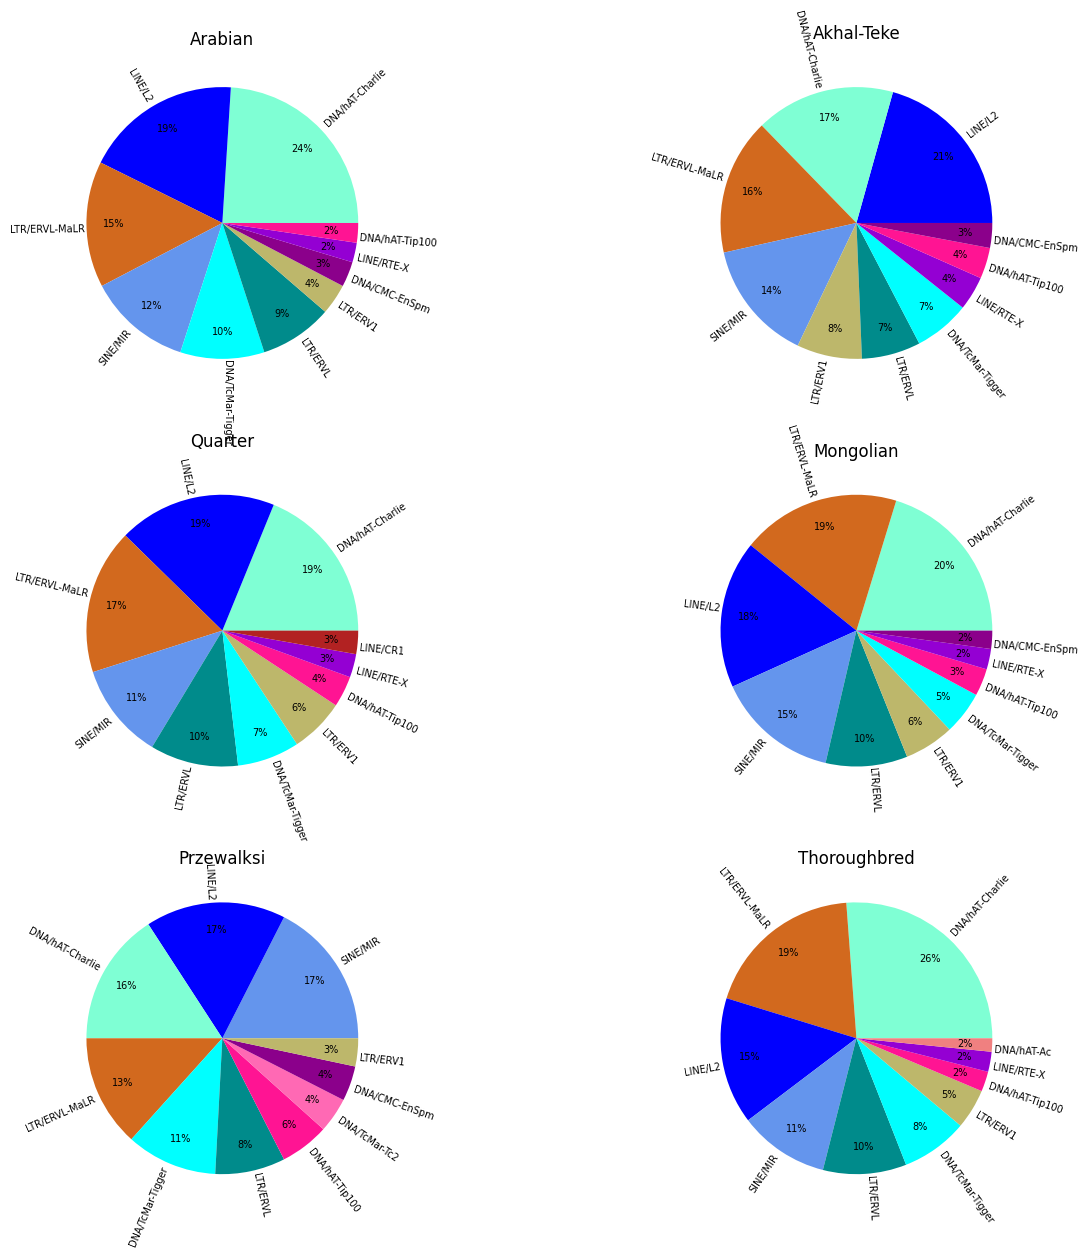

In [123]:
import matplotlib.colors as mcolors
df = pd.read_csv('horse/annotated_tes/arabian_te.txt', sep='\t', lineterminator='\n')
df.columns = ['chrom','start','end','subfam','fam']
df = df[df["subfam"].str.contains("L1") == False]
x = df['subfam'].value_counts()
y = df['fam'].value_counts()
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 15))

df1 = pd.read_csv('horse/annotated_tes/akhal_te.txt', sep='\t', lineterminator='\n')
df1.columns = ['chrom','start','end','subfam','fam']
df1 = df1[df1["subfam"].str.contains("L1") == False]
x1 = df1['subfam'].value_counts()
y1 = df1['fam'].value_counts()


df2 = pd.read_csv('horse/annotated_tes/quarter_te.txt', sep='\t', lineterminator='\n')
df2.columns = ['chrom','start','end','subfam','fam']
df2 = df2[df2["subfam"].str.contains("L1") == False]
x2 = df2['subfam'].value_counts()
y2 = df2['fam'].value_counts()

df3 = pd.read_csv('horse/annotated_tes/mongolian_te.txt', sep='\t', lineterminator='\n')
df3.columns = ['chrom','start','end','subfam','fam']
df3 = df3[df3["subfam"].str.contains("L1") == False]
x3 = df3['subfam'].value_counts()
y3 = df3['fam'].value_counts()

df4 = pd.read_csv('horse/annotated_tes/thorough_te.txt', sep='\t', lineterminator='\n')
df4.columns = ['chrom','start','end','subfam','fam']
df4 = df4[df4["subfam"].str.contains("L1") == False]
x4 = df4['subfam'].value_counts()
y4 = df4['fam'].value_counts()

df5 = pd.read_csv('horse/annotated_tes/przewalksi_te.txt', sep='\t', lineterminator='\n')
df5.columns = ['chrom','start','end','subfam','fam']
df5 = df5[df5["subfam"].str.contains("L1") == False]
x5 = df5['subfam'].value_counts()
y5 = df5['fam'].value_counts()

colors = mcolors.CSS4_COLORS
#del colors['black']
#del colors['white']
delete_colors = ['black','snow','white','dimgray','grey','gray','lightgray','antiquewhite','cornsilk', \
                 'coral', 'blanchedalmond','darkblue','burlywood', 'cadetblue', 'darkgray', 'darkgoldenrod', \
                 'darkgrey', 'lemonchiffon', 'darkseagreen', 'darkslategrey', 'dimgrey', 'lightslategray', \
                'lightslategrey', 'lightgoldenrodyellow' , 'beige', 'darkorchid', 'floralwhite', 'bisque', \
                'deepskyblue', 'dodgerblue', 'ivory', 'brown', 'indigo', 'chartreuse', 'darkolivegreen', \
                'ghostwhite', 'green','lightgrey', 'darksalmon', 'lawngreen', 'lavender', 'aliceblue', \
                'lightskyblue', 'fuchsia', 'lightcyan' , 'honeydew', 'darkred', 'lightblue', 'lavenderblush',\
                'mediumpurple', 'darkorange', 'darkslateblue','darkslategray','blueviolet','aqua' , \
                'darkturquoise','darkgreen','azure', 'gainsboro','goldenrod']
for c in delete_colors:
    if c in colors.keys():
        del colors[c]
#del colors['whites']
cols = list(colors.keys())

s = 0
e = 10

t = y
t1 = y1

t2 = y2
t3 = y3
t4 = y4
t5 = y5



#labels = set(list(t1.keys()) + list(t.keys()))
#print(len(labels))
#print(labels)
#shared_labels = set.intersection(set(t.keys()), set(t1.keys()), set(t2.keys()), \
#                                 set(t3.keys()),set(t4.keys()), set(t5.keys())) 
shared_labels = list(t.keys())
shared_labels.extend(x for x in t1.keys() if x not in shared_labels)
shared_labels.extend(x for x in t2.keys() if x not in shared_labels)
shared_labels.extend(x for x in t3.keys() if x not in shared_labels)
shared_labels.extend(x for x in t4.keys() if x not in shared_labels)
shared_labels.extend(x for x in t5.keys() if x not in shared_labels)
#print(shared_labels)
colours = dict(zip(shared_labels, cols[:len(shared_labels)]))
#colours = dict(zip(shared_labels, plt.cm.tab10.colors[:len(shared_labels)]))
print(colours)
print(len(colours))

plot = t[s:e].plot.pie(title="Arabian", legend=False, ylabel='',textprops={'fontsize': 7}, \
                   autopct='%.0f%%',  pctdistance=.8, labeldistance=1.01 , \
                   shadow=False, startangle=0, ax=axes[0,0], radius = 1.0, rotatelabels=True,
                   colors=[colours[v] if v in colours else 'black' for v in t[s:e].keys()])

plot = t1[s:e].plot.pie(title="Akhal-Teke", legend=False, ylabel='',textprops={'fontsize': 7}, \
                   autopct='%.0f%%',  pctdistance=.8, labeldistance=1.01 , \
                   shadow=False, startangle=0, ax=axes[0,1], radius = 1.0, rotatelabels=True,
                   colors=[colours[v] if v in colours else 'black' for v in t1[s:e].keys()])


plot = t2[s:e].plot.pie(title="Quarter", legend=False, ylabel='',textprops={'fontsize': 7}, \
                   autopct='%.0f%%',  pctdistance=.8, labeldistance=1.01 , \
                   shadow=False, startangle=0, ax=axes[1,0], radius = 1.0, rotatelabels=True,
                   colors=[colours[v] if v in colours else 'black' for v in t2[s:e].keys()])

plot = t3[s:e].plot.pie(title="Mongolian", legend=False, ylabel='',textprops={'fontsize': 7}, \
                   autopct='%.0f%%',  pctdistance=.8, labeldistance=1.01 , \
                   shadow=False, startangle=0, ax=axes[1,1], radius = 1.0, rotatelabels=True,
                   colors=[colours[v] if v in colours else 'black' for v in t3[s:e].keys()])

plot = t4[s:e].plot.pie(title="Thoroughbred", legend=False, ylabel='',textprops={'fontsize': 7}, \
                   autopct='%.0f%%',  pctdistance=.8, labeldistance=1.01 , \
                   shadow=False, startangle=0, ax=axes[2,1], radius = 1.0, rotatelabels=True,
                   colors=[colours[v] if v in colours else 'black' for v in t4[s:e].keys()])

plot = t5[s:e].plot.pie(title="Przewalksi", legend=False, ylabel='',textprops={'fontsize': 7}, \
                   autopct='%.0f%%',  pctdistance=.8, labeldistance=1.01 , \
                   shadow=False, startangle=0, ax=axes[2,0], radius = 1.0, rotatelabels=True,
                   colors=[colours[v] if v in colours else 'black' for v in t5[s:e].keys()])

ax = axes[0,1]
ax.set_title('Akhal-Teke', pad = 10)

ax = axes[1,0]
ax.set_title('Quarter', pad = 10)

ax = axes[1,1]
ax.set_title('Mongolian', pad = -7)

ax = axes[2,0]
ax.set_title('Przewalksi', pad = -10)

ax = axes[2,1]
ax.set_title('Thoroughbred', pad = -10)
#fig.title('Top 20 TE Subfamily Content')
plt.savefig('horse/results/horse_pie_fam.pdf')

In [17]:
import matplotlib.colors as mcolors df = pd.read_csv('horse/annotated_tes/arabian_te.txt', sep='\t', lineterminator='\n') df.columns = ['chrom','start','end','subfam','fam'] df = df[df["subfam"].str.contains("L1") == False] x = df['subfam'].value_counts() y = df['fam'].value_counts() fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 15))

df1 = pd.read_csv('horse/annotated_tes/akhal_te.txt', sep='\t', lineterminator='\n') df1.columns = ['chrom','start','end','subfam','fam'] df1 = df1[df1["subfam"].str.contains("L1") == False] x1 = df1['subfam'].value_counts() y1 = df1['fam'].value_counts()

df2 = pd.read_csv('horse/annotated_tes/quarter_te.txt', sep='\t', lineterminator='\n') df2.columns = ['chrom','start','end','subfam','fam'] df2 = df2[df2["subfam"].str.contains("L1") == False] x2 = df2['subfam'].value_counts() y2 = df2['fam'].value_counts()

df3 = pd.read_csv('horse/annotated_tes/mongolian_te.txt', sep='\t', lineterminator='\n') df3.columns = ['chrom','start','end','subfam','fam'] df3 = df3[df3["subfam"].str.contains("L1") == False] x3 = df3['subfam'].value_counts() y3 = df3['fam'].value_counts()

df4 = pd.read_csv('horse/annotated_tes/thorough_te.txt', sep='\t', lineterminator='\n') df4.columns = ['chrom','start','end','subfam','fam'] df4 = df4[df4["subfam"].str.contains("L1") == False] x4 = df4['subfam'].value_counts() y4 = df4['fam'].value_counts()

df5 = pd.read_csv('horse/annotated_tes/przewalksi_te.txt', sep='\t', lineterminator='\n') df5.columns = ['chrom','start','end','subfam','fam'] df5 = df5[df5["subfam"].str.contains("L1") == False] x5 = df5['subfam'].value_counts() y5 = df5['fam'].value_counts()

colors = mcolors.CSS4_COLORS #del colors['black'] #del colors['white'] delete_colors = ['black','snow','white','dimgray','grey','gray','lightgray','antiquewhite','cornsilk',
'coral', 'blanchedalmond','darkblue','burlywood', 'cadetblue', 'darkgray', 'darkgoldenrod',
'darkgrey', 'lemonchiffon', 'darkseagreen', 'darkslategrey', 'dimgrey', 'lightslategray',
'lightslategrey', 'lightgoldenrodyellow' , 'beige', 'darkorchid', 'floralwhite', 'bisque',
'deepskyblue', 'dodgerblue', 'ivory', 'brown', 'indigo', 'chartreuse', 'darkolivegreen',
'ghostwhite', 'green','lightgrey', 'darksalmon', 'lawngreen', 'lavender', 'aliceblue',
'lightskyblue', 'fuchsia', 'lightcyan' , 'honeydew', 'darkred', 'lightblue', 'lavenderblush',
'red', 'coral','tomato','crimson'] for c in delete_colors: if c in colors.keys(): del colors[c] #del colors['whites'] cols = list(colors.keys())

s = 1 e = 19

t = x t1 = x1

t2 = x2 t3 = x3 t4 = x4 t5 = x5

#labels = set(list(t1.keys()) + list(t.keys())) #print(len(labels)) #print(labels) shared_labels = set.intersection(set(t.keys()), set(t1.keys()), set(t2.keys()), set(t3.keys()))

print(shared_labels) colours = dict(zip(shared_labels, cols[:len(shared_labels)])) print(colours) print(len(colours))

plot = t[s:e].plot.pie(title="Arabian", legend=False, ylabel='',textprops={'fontsize': 7},
autopct='%1.1f%%', pctdistance=.8, labeldistance=1.01 ,
shadow=False, startangle=0, ax=axes[0,0], radius = 1.0, rotatelabels=True, colors=[colours[v] if v in colours else 'red' for v in t[s:e].keys()])

plot = t1[s:e].plot.pie(title="Akhal", legend=False, ylabel='',textprops={'fontsize': 7},
autopct='%1.1f%%', pctdistance=.8, labeldistance=1.01 ,
shadow=False, startangle=0, ax=axes[0,1], radius = 1.0, rotatelabels=True, colors=[colours[v] if v in colours else 'red' for v in t1[s:e].keys()])

plot = t2[s:e].plot.pie(title="Quarter", legend=False, ylabel='',textprops={'fontsize': 7},
autopct='%1.1f%%', pctdistance=.8, labeldistance=1.01 ,
shadow=False, startangle=0, ax=axes[1,0], radius = 1.0, rotatelabels=True, colors=[colours[v] if v in colours else 'red' for v in t2[s:e].keys()])

plot = t3[s:e].plot.pie(title="Mongolian", legend=False, ylabel='',textprops={'fontsize': 7},
autopct='%1.1f%%', pctdistance=.8, labeldistance=1.01 ,
shadow=False, startangle=0, ax=axes[1,1], radius = 1.0, rotatelabels=True, colors=[colours[v] if v in colours else 'red' for v in t3[s:e].keys()])

plot = t4[s:e].plot.pie(title="Thoroughbred", legend=False, ylabel='',textprops={'fontsize': 7},
autopct='%1.1f%%', pctdistance=.8, labeldistance=1.01 ,
shadow=False, startangle=0, ax=axes[2,1], radius = 1.0, rotatelabels=True, colors=[colours[v] if v in colours else 'red' for v in t4[s:e].keys()])

plot = t5[s:e].plot.pie(title="Przewalksi", legend=False, ylabel='',textprops={'fontsize': 7},
autopct='%1.1f%%', pctdistance=.8, labeldistance=1.01 ,
shadow=False, startangle=0, ax=axes[2,0], radius = 1.0, rotatelabels=True, colors=[colours[v] if v in colours else 'red' for v in t5[s:e].keys()])

ax = axes[2,0] ax.set_title('Przewalksi', pad = 12)

